
Thông tin mô tả dữ liệu:
       X-Acceleration  Y-Acceleration  Z-Acceleration   X-Velocity  \
count     1690.000000     1690.000000     1690.000000  1690.000000   
mean        12.819815       13.407432        6.625957     5.054279   
std          7.406752        7.562358        4.150719     7.457963   
min          0.002359        0.000154        0.004475     0.011299   
25%         11.945312       12.142578        4.879883     1.408447   
50%         14.312500       15.480469        6.912109     2.054688   
75%         17.058594       18.203125        9.710938     5.054000   
max         35.281250       33.187500       17.390625    58.625000   

        Y-Velocity   Z-Velocity  Composite-Acceleration  Composite-Velocity  \
count  1690.000000  1690.000000             1690.000000         1690.000000   
mean      5.040527     1.720628               16.114136            7.555773   
std       7.613807     1.236337                9.210682           10.403755   
min       0.018646     0.01

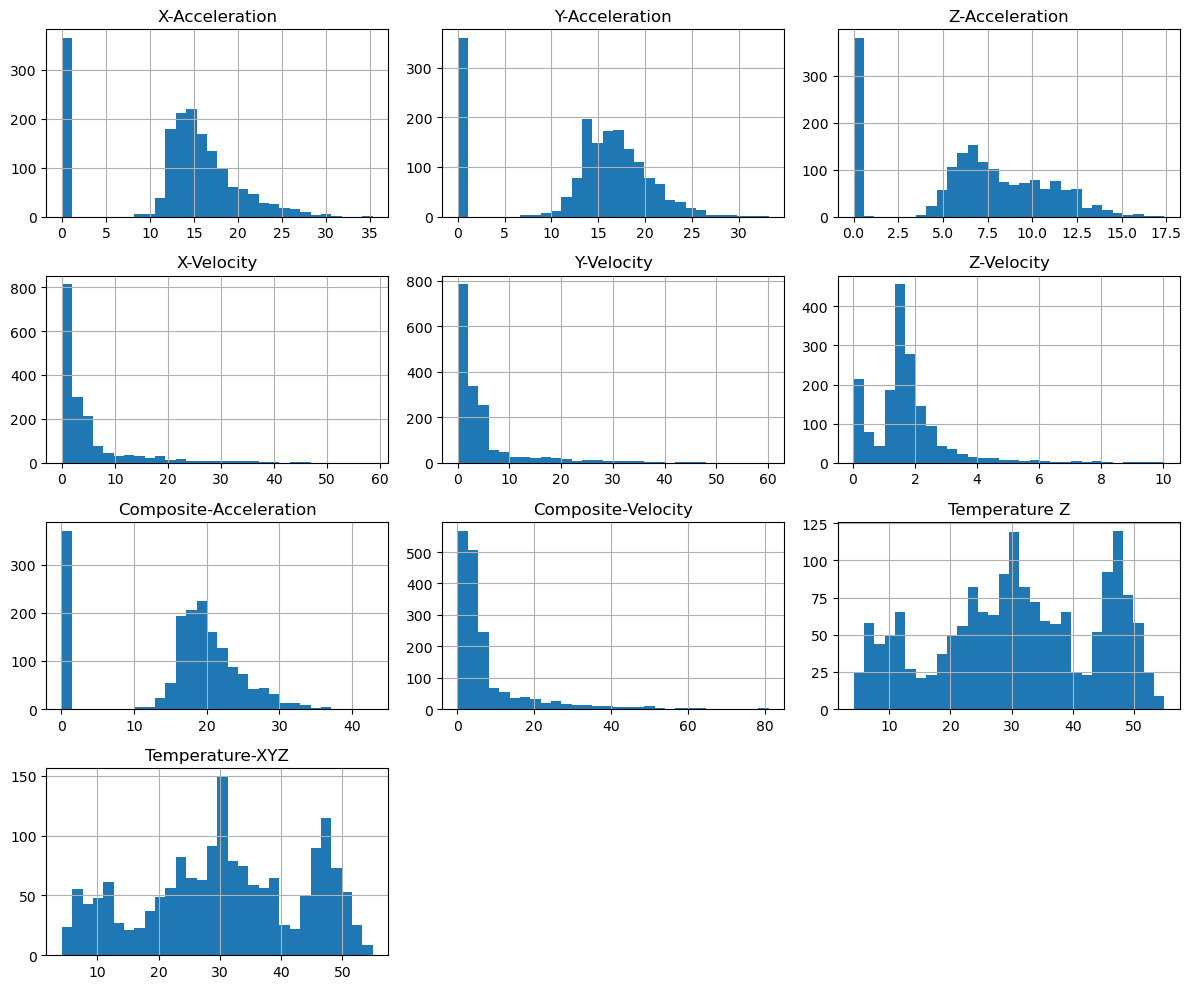

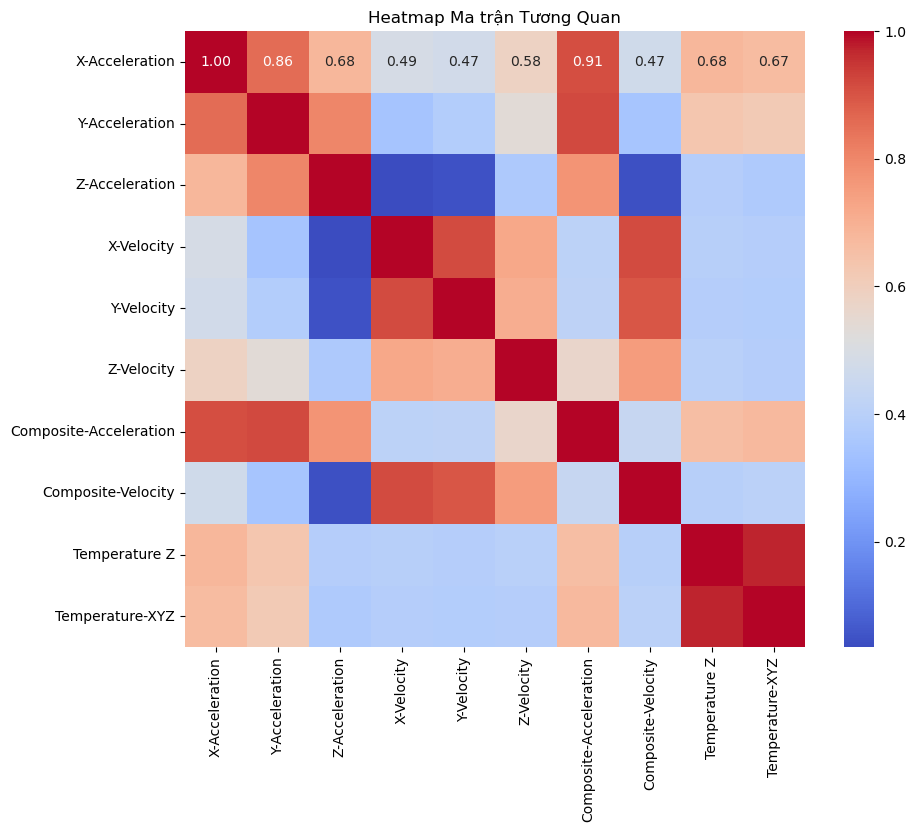


Số lượng giá trị bị thiếu trên từng cột:
Time                      0
X-Acceleration            0
Y-Acceleration            0
Z-Acceleration            0
X-Velocity                0
Y-Velocity                0
Z-Velocity                0
Composite-Acceleration    0
Composite-Velocity        0
Temperature Z             0
Temperature-XYZ           0
dtype: int64


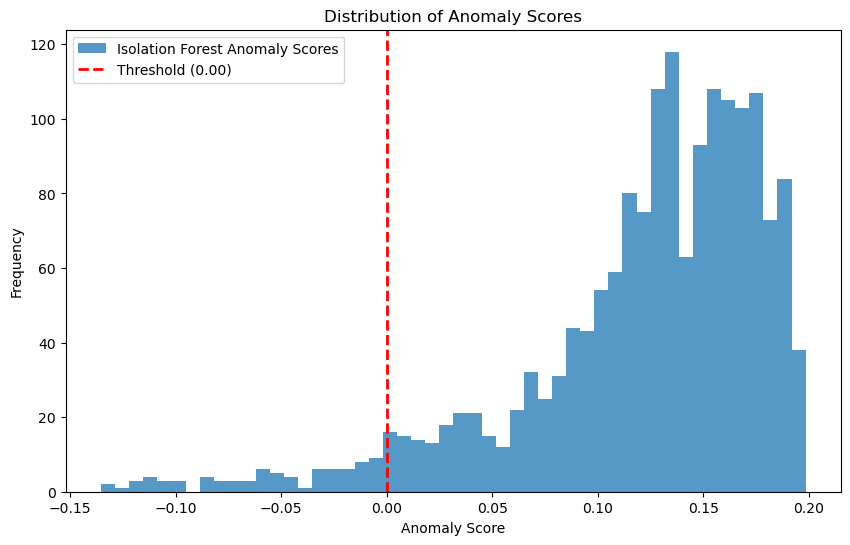


Số lượng điểm bất thường được phát hiện: 85
Tổng số điểm dữ liệu: 1690


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv('../../data/Chiller.csv')

# Kiểm tra tổng quan về dữ liệu
print("\nThông tin mô tả dữ liệu:")
print(data.describe())
print("\nKiểm tra dữ liệu thiếu:")
print(data.isnull().sum())

# 2. EDA - Phân tích dữ liệu
# 2.1. Phân phối dữ liệu
print("\nPhân phối dữ liệu trên từng cột:")
data.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# 2.2. Ma trận tương quan
# Chỉ giữ lại các cột số
numeric_data = data.select_dtypes(include=[np.number])

# Tính ma trận tương quan
correlation_matrix = numeric_data.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Ma trận Tương Quan")
plt.show()

# 2.3. Kiểm tra dữ liệu bị thiếu
missing_data = data.isnull().sum()
print("\nSố lượng giá trị bị thiếu trên từng cột:")
print(missing_data)

# 3. Chọn các cột đặc trưng (bỏ qua các cột không cần thiết nếu có)
features = data.drop(columns=['Time'], errors='ignore')  # Bỏ cột 'Time' nếu có

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 5. Khởi tạo và huấn luyện Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(scaled_features)

# 6. Dự đoán điểm bất thường
anomaly_scores = iso_forest.decision_function(scaled_features)  # Điểm bất thường
anomalies = iso_forest.predict(scaled_features)  # -1 là bất thường, 1 là bình thường
anomalies = np.where(anomalies == -1, 1, 0)  # Chuyển -1 -> 1 (bất thường), 1 -> 0 (bình thường)

# 7. Vẽ biểu đồ phân phối điểm bất thường
threshold = np.percentile(anomaly_scores, 5)  # Chọn ngưỡng từ phân vị 5%
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.75, label='Isolation Forest Anomaly Scores')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold:.2f})')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()

# 8. Kết quả
print("\nSố lượng điểm bất thường được phát hiện:", anomalies.sum())
print("Tổng số điểm dữ liệu:", len(anomaly_scores))
